# New Targets

So far, we have only run classifaction models on one set of features seeking to find one target variable. Going forward, we will test a few different arrangements of features and targets.

In [1]:
from imports import *

In [2]:
df = pd.read_csv('data/cleaned_df.csv')
dummies_df = pd.get_dummies(df, drop_first=True)
dummies_df.columns = dummies_df.columns.str.replace(' ','_')
#dummies_df.info()

There are a large number of potential features in this dataset, as well as 3 potential targets: Arrested, Legal_Action_Taken, and Physical_Arrest. In the [previous notebook](./terry_models.ipynb) we only attempted to find Physical Arrests using all the data that existed.

The first thing we do is see if there are better results with each of our other target variables, using Machine Learning Pipelines to streamline the workflow.

In [3]:
# logreg_param_grid = {'classifier' : [LogisticRegression(random_state=42, max_iter=1000)],
#                      'penalty' : ['l1', 'l2'],
#                      'C' : np.logspace(-2, 2, 10),
#                      'solver' :  ['liblinear']}

# Initialze the estimators
clf_forest = RandomForestClassifier(random_state=42)
clf_logreg = LogisticRegression(random_state=42, max_iter=1000)
clf_xgb = XGBClassifier(random_state=42)

logreg_param = {}
logreg_param['classifier__C'] = np.logspace(-2, 2, 10)
logreg_param['classifier__penalty'] = ['l1', 'l2']
logreg_param['classifier'] = [clf_logreg]


forest_param = {}
forest_param['classifier__n_estimators'] = [10,100,1000]
forest_param['classifier__max_depth'] = [None, 3, 4, 10]
forest_param['classifier__max_features'] = ['sqrt', 'log2', 2, 5, 10],
forest_param['classifier'] = [clf_forest]

xgb_param = {}
xgb_param['classifier__n_estimators'] = [10,100,1000]
xgb_param['classifier__learning_rate'] = [0.001, 0.01, 0.1]
xgb_param['classifier__subsample'] =  np.linspace(0.1, 1, 4)
xgb_param['classifier__max_depth'] = [3, 7, 9]
xgb_param['classifier'] = [clf_xgb]

### Target: Arrested

In [4]:
# split data for new feature
X= dummies_df.drop('Arrested', axis=1)
y = dummies_df['Arrested']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

params = [logreg_param, forest_param]
#pipeline
pipeline = imbpipeline([('smote', SMOTE(random_state=42)), ('classifier', LogisticRegression())])

arrested_cv = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=True, scoring='f1')

arrested_cv.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   36.4s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(C=100.0,
                                                            max_iter=1000,
                                                            random_state=42)],
                          'classifier__C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [RandomForestClassifier(random_state=42)],
                          'classifier__max_depth': [None, 3, 4, 10],
                          'classifier__max_features': (['sqrt', 'log2', 2, 5,
                                                        10],)

In [5]:
arrested_cv.best_params_


{'classifier': LogisticRegression(C=100.0, max_iter=1000, random_state=42),
 'classifier__C': 100.0,
 'classifier__penalty': 'l2'}

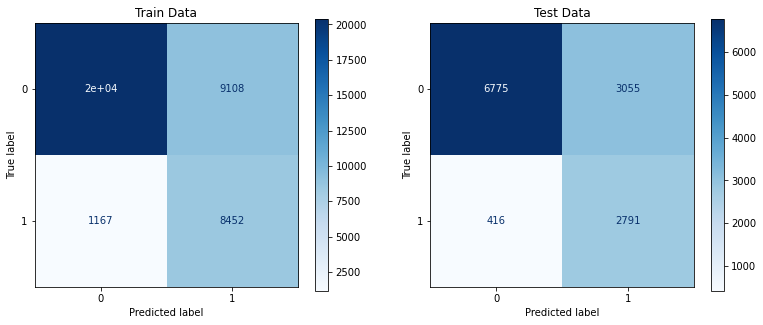

Train Data:                                 Test Data:
Accuracy:  0.7372794681667093               Accuracy:  0.7337577663572908
Recall:    0.8786776172159269               Recall:    0.870283754287496
Precision: 0.4813211845102506               Precision: 0.47742045843311665
F1:        0.6219507708157034               F1:        0.616591185242461


In [6]:
plot_confusion(arrested_cv, X_train, X_test, y_train, y_test)
clf_scores(arrested_cv, X_train, X_test, y_train, y_test)

### Target: Legal Action Taken

In [7]:
# split data for new feature
X= dummies_df.drop('Legal_Action_Taken', axis=1)
y = dummies_df['Legal_Action_Taken']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

params = [logreg_param, forest_param]
#pipeline
pipeline = imbpipeline([('smote', SMOTE(random_state=42)), ('classifier', LogisticRegression())])

legal_cv = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=True, scoring='f1')

legal_cv.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   40.8s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(C=35.93813663804626,
                                                            max_iter=1000,
                                                            random_state=42)],
                          'classifier__C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [RandomForestClassifier(random_state=42)],
                          'classifier__max_depth': [None, 3, 4, 10],
                          'classifier__max_features': (['sqrt', 'log2', 2, 5,
                                                 

In [8]:
legal_cv.best_params_

{'classifier': LogisticRegression(C=35.93813663804626, max_iter=1000, random_state=42),
 'classifier__C': 35.93813663804626,
 'classifier__penalty': 'l2'}

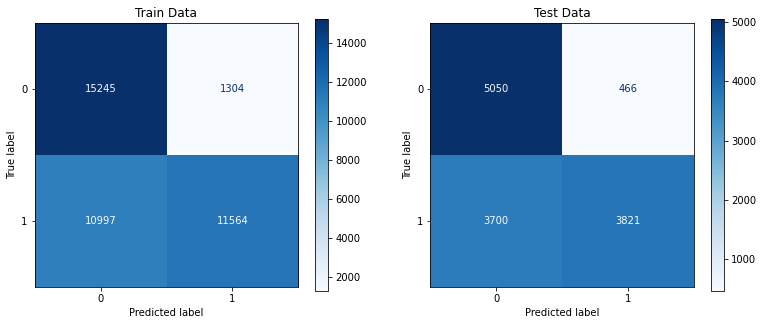

Train Data:                                 Test Data:
Accuracy:  0.6854768601380721               Accuracy:  0.6804479558180563
Recall:    0.5125659323611542               Recall:    0.5080441430660816
Precision: 0.8986633509480882               Precision: 0.8912992768836016
F1:        0.6527985548561913               F1:        0.6471883468834688


In [9]:
plot_confusion(legal_cv, X_train, X_test, y_train, y_test)
clf_scores(legal_cv, X_train, X_test, y_train, y_test)

# ETC ETC ETC

We can, in this moment, view the most significant features in the outcomes of this classifier

In [10]:
# #obtain the feature importances from within the GridSearchCV, pipeline, & OneVsRest objects
# fi = [x.feature_importances_ for x in legal_cv.best_estimator_.estimators_]
# fi = np.mean(fi, axis = 0)

# #place the feature importances in a dataframe
# feature_importances = pd.DataFrame(fi,
#                                    index = X_train.columns,
#                                     columns=['importance']).sort_values('importance',ascending=False)
# feature_importances.head(5)

AttributeError: 'Pipeline' object has no attribute 'estimators_'

<AxesSubplot:title={'center':'Modal Coefficients'}>

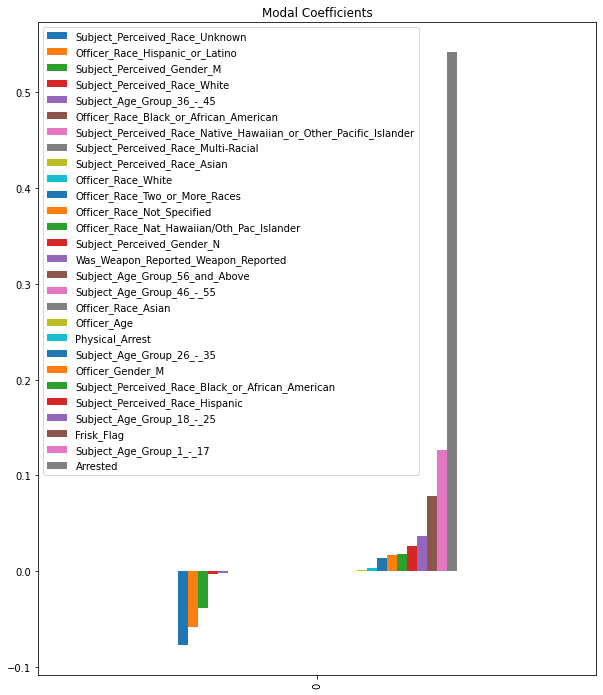

In [19]:
lasso = Lasso(alpha = 0.001, normalize = False)
lasso = lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_train)

lasso_coef = pd.DataFrame(data=lasso.coef_).T
lasso_coef.columns = X_train.columns
lasso_coef = lasso_coef.T.sort_values(by=0).T
lasso_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(10,12))

In [20]:
lasso_coef.T

,0
Subject_Perceived_Race_Unknown,-0.076923
Officer_Race_Hispanic_or_Latino,-0.058239
Subject_Perceived_Gender_M,-0.038591
Subject_Perceived_Race_White,-0.003313
Subject_Age_Group_36_-_45,-0.001625
Officer_Race_Black_or_African_American,-0.000000
Subject_Perceived_Race_Native_Hawaiian_or_Other_Pacific_Islander,-0.000000
Subject_Perceived_Race_Multi-Racial,0.000000
Subject_Perceived_Race_Asian,-0.000000
Officer_Race_White,-0.000000
